<a href="https://colab.research.google.com/github/jayantc14/Yelp_Data_Analysis/blob/main/ML_Models_yelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import plot_importance
from bs4 import BeautifulSoup

import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/yelp_dataset/final_data_yelp2.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,business_id,city,state_x,user_id,review_stars,useful_x,text,date,useful_y,fans,Smogscore,review_word_count,Polarity,Analysis_TextBlob,Vader Sentiment,Vader Analysis,fips,cases,deaths,label
0,0,0,uexKxrLmPO5iaXRT9TvWqQ,Portland,OR,1eSNY9Csb9ajO7__ci2vTA,3.0,0.0,Yes I am a fan of the food Ive tried more ...,2019-01-01,0.0,0.0,13.4,251.0,0.050208,Positive,0.7723,Positive,0.0,0.0,0.0,1.0
1,1,1,b4PgITSqSWoPhyJ-Mjko7Q,Portland,OR,KYCpm1B9eIIgbPatCIcVkg,4.0,0.0,Im not a bubble tea connoisseur but Ive had it...,2019-01-01,328.0,6.0,0.0,46.0,0.263889,Positive,0.8519,Positive,0.0,0.0,0.0,1.0
2,2,2,2EJpVjliJ6Ceijbz9HSpeQ,Portland,OR,f1lLNjrLk4ETU2t_N7fHbA,5.0,1.0,Fantastic authentic Italian food the pinsa ha...,2019-01-01,8.0,0.0,12.2,74.0,0.360000,Positive,0.9307,Positive,0.0,0.0,0.0,1.0
3,3,3,7m_Tj6xC5CjulQ-6Wucdpw,Portland,OR,uOSQbOnLRlAuWfCSCwQFnA,5.0,0.0,Good food very authentic The owner is pretty f...,2019-01-01,1.0,0.0,6.4,16.0,0.425000,Positive,0.9169,Positive,0.0,0.0,0.0,1.0
4,4,4,DgvT9AiuePR8Z0SKV5BFvw,Portland,OR,bSTMk_GXsPE93COgqUDnMg,4.0,0.0,The service is outstanding and the pasta is go...,2019-01-01,0.0,0.0,8.8,39.0,0.450000,Positive,0.9217,Positive,0.0,0.0,0.0,1.0


In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'city', 'state_x',
       'user_id', 'review_stars', 'useful_x', 'date', 'useful_y',
       'fans', 'Smogscore', 'review_word_count', 'Polarity',
       'Analysis_TextBlob', 'Vader Sentiment', 'Vader Analysis', 'fips',
       'cases', 'deaths'],axis = 1,inplace = True)

In [ ]:
df

,text,label
0,Yes I am a fan of the food Ive tried more ...,1.0
1,Im not a bubble tea connoisseur but Ive had it...,1.0
2,Fantastic authentic Italian food the pinsa ha...,1.0
3,Good food very authentic The owner is pretty f...,1.0
4,The service is outstanding and the pasta is go...,1.0
...,...,...
197944,I have to admit Shin Hakata Ramen was truly im...,1.0
197945,The BEST Rueben in Boston Hands down And I hav...,1.0
197946,Mike Pattys is such a cool neighborhood gem I...,1.0
197947,Store is a little hard to find since it is hid...,1.0


In [ ]:
data = df

## **Text Preprocesing**

Converting all reviews to lower case

In [ ]:
data['pre_process'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

Removing the HTML tags and URLs from the reviews

In [ ]:

data['pre_process']=data['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())

data['pre_process'] = data['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

Perform the Contractions on the reviews.
Example: it won’t be converted as it will not be

In [ ]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))

Removing non-alpha characters

In [ ]:
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

Removing the extra spaces between the words

In [ ]:
data['pre_process'] = data['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

Removing the stop words by using the NLTK package

In [ ]:

stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

Performing lemmatization using the wordnet lemmatizer

In [ ]:

lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
data.head()

,text,label,pre_process
0,Yes I am a fan of the food Ive tried more ...,1.0,yes fan food ive tried chinese american restau...
1,Im not a bubble tea connoisseur but Ive had it...,1.0,im bubble tea connoisseur ive couple place aro...
2,Fantastic authentic Italian food the pinsa ha...,1.0,fantastic authentic italian food pinsa crunchy...
3,Good food very authentic The owner is pretty f...,1.0,good food authentic owner pretty friendly well...
4,The service is outstanding and the pasta is go...,1.0,service outstanding pasta good strictly pasta ...


Splitting the data into train and test sets

In [ ]:

X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (148461,) (148461,) Test:  ((49488,), (49488,))


## **Feature Extraction using TFIDF**

TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix).

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [ ]:
# Create the list of vocabulary used for the vectorizer.

vocab = vectorizer.get_feature_names()


In [ ]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 88849


## **Model Building**

```

```


Logistic Regression

In [ ]:

clf = LogisticRegression(max_iter=1000,solver='saga')

In [ ]:
clf.fit(tf_x_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
accuracy_score(Y_test, y_test_pred)

0.9500687035240867

In [ ]:
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70      4868
         1.0       0.96      0.99      0.97     44620

    accuracy                           0.95     49488
   macro avg       0.90      0.79      0.84     49488
weighted avg       0.95      0.95      0.95     49488



Since there are 88,849 features, it is impossible to look at all of the coefficients at the same time. Therefore, we can sort them and look at the largest coefficients. The following bar chart shows the 30 largest and 30 smallest coefficients of the Logistic Regression model, with the bars showing the size of each coefficients.

In [ ]:
# Extract the coefficients from the best model Logistic Regression and sort them by index.
coefficients = clf.coef_
index = coefficients.argsort()

In [ ]:
# Extract the feature names.
feature_names = np.array(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# From the smallest to largest.
feature_names[index][0][:30]

array(['worst', 'bad', 'rude', 'horrible', 'terrible', 'disappointing',
       'disgusting', 'poor', 'disappointed', 'hell', 'awful', 'die',
       'dirty', 'gross', 'hate', 'worse', 'sick', 'wrong', 'bomb', 'sad',
       'shit', 'killer', 'ruined', 'wasnt', 'ill', 'disappointment',
       'fuck', 'ridiculous', 'negative', 'poisoning'], dtype='<U124')

In [ ]:
# From the smallest to largest.
feature_names[index][0][-31::1]

array(['beautiful', 'sure', 'free', 'well', 'fresh', 'wonderful', 'yummy',
       'kind', 'sweet', 'better', 'fantastic', 'enjoyed', 'like',
       'awesome', 'favorite', 'loved', 'perfect', 'happy', 'definitely',
       'excellent', 'friend', 'nice', 'pretty', 'super', 'friendly',
       'amazing', 'love', 'good', 'best', 'delicious', 'great'],
      dtype='<U124')

In [ ]:
# feature names: Smallest 30 + largest 30.
feature_names_comb = list(feature_names[index][0][:30]) + list(feature_names[index][0][-31::1])

In [ ]:
# coefficients magnitude: Smallest 30 + largest 30.
index_comb = list(coefficients[0][index[0][:30]]) + list(coefficients[0][index[0][-31::1]])

In [ ]:
import matplotlib.pyplot as plt


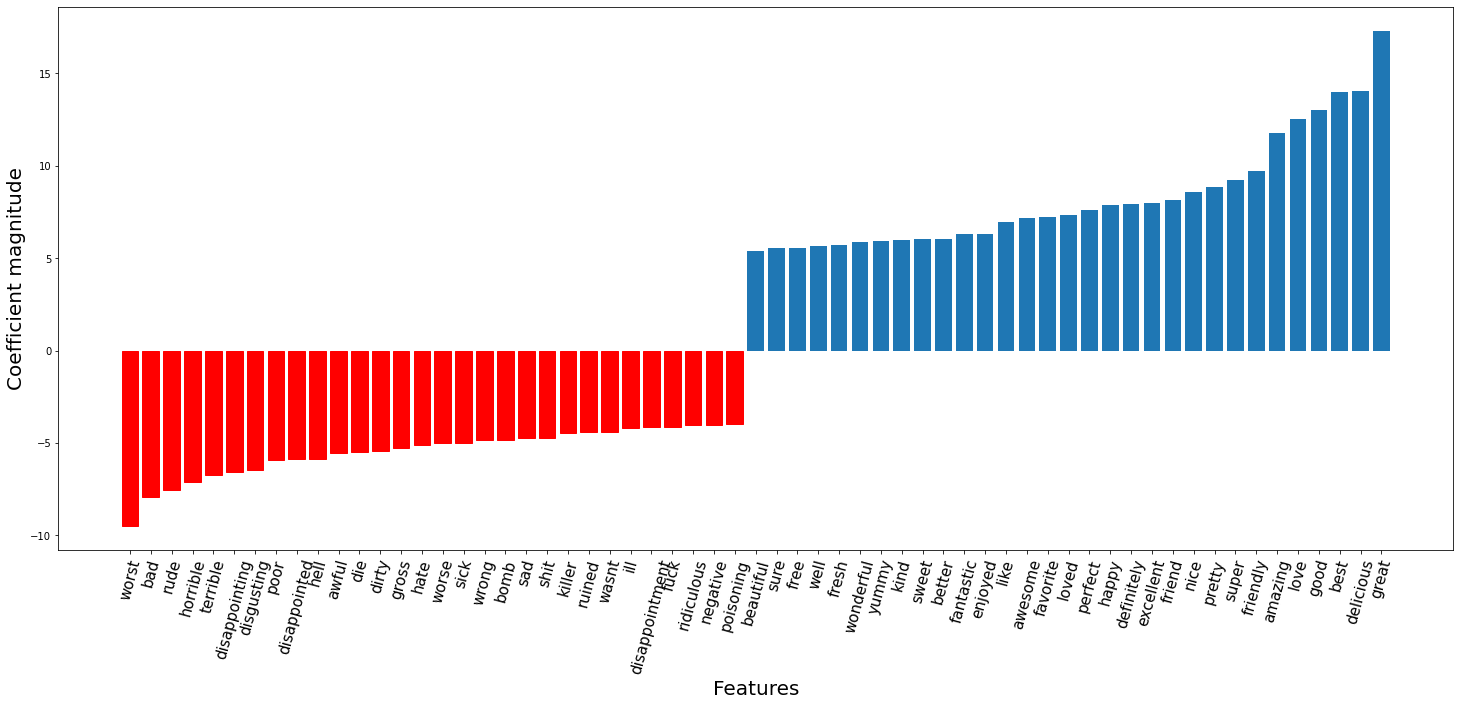

In [ ]:
# Make sure the x-axis be the number from 0 to the length of the features selected not the feature names.
# Once the bar is plotted, the features are placed as ticks.
plt.figure(figsize=(25,10))
barlist = plt.bar(list(i for i in range(61)), index_comb)
plt.xticks(list(i for i in range(61)),feature_names_comb,rotation=75,size=15)
plt.ylabel('Coefficient magnitude',size=20)
plt.xlabel('Features',size=20)

# color the first smallest 30 bars red
for i in range(30):
    barlist[i].set_color('red')

plt.show()

SVM

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [ ]:
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
accuracy_score(Y_test, y_test_pred)

0.9531199482702878

In [ ]:
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74      4868
         1.0       0.97      0.98      0.97     44620

    accuracy                           0.95     49488
   macro avg       0.89      0.84      0.86     49488
weighted avg       0.95      0.95      0.95     49488



XG Boost

In [ ]:
clf =XGBClassifier()

In [ ]:
clf.fit(tf_x_train,Y_train)

XGBClassifier()

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
accuracy_score(Y_test, y_test_pred)

0.9210111542192047

In [ ]:
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.25      0.38      4868
         1.0       0.92      0.99      0.96     44620

    accuracy                           0.92     49488
   macro avg       0.88      0.62      0.67     49488
weighted avg       0.91      0.92      0.90     49488



Random Forest

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
clf = RandomForestClassifier()

In [ ]:
clf.fit(tf_x_train,Y_train)

RandomForestClassifier()

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
accuracy_score(Y_test, y_test_pred)

0.917151632719043

In [ ]:
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.18      0.29      4868
         1.0       0.92      1.00      0.96     44620

    accuracy                           0.92     49488
   macro avg       0.91      0.59      0.62     49488
weighted avg       0.92      0.92      0.89     49488

